<a href="https://colab.research.google.com/github/arthuravilez/mackenzie/blob/master/Exerc%C3%ADcio_de_Trilha4_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

'
Aqui você vai empregar os conhecimentos aprendidos de Python para efetuar sua própria Análise de Dados. Empregue bases de dados extraídas de um ou ambos os sites abaixo:  

a. https://wid.world/

b. https://www.gapminder.org/

O emprego de uma base formada por dados de ambos os sites é bastante enriquecedor mas não é obrigatório. Você pode empregar uma ou mais bases de um único site e deixar para estudar mais adiante merges e joins de tabelas com R. 

Faça uma Análise Exploratória dos Dados (EDA) com dados de seu interesse, empregando o Python e o que você aprendeu até aqui. Os sites apresentam diversos dados sobre as diferenças de desenvolvimento dos países e a desigualdade. Foque em perguntas que são do seu interesse sobre os dados.  

Na sua análise você deve responder ao menos quatro perguntas relevantes sobre os dados, incluir na sua análise seleções e visualizações dos dados e um texto de conclusão a cada pergunta.  

Peça ao professor modelos de código para sua implementação. 

Seu código deve ser minimamente claro e organizado. Não são necessários comentários detalhados, mas deixe claro no seu código cada parte (atividade), cada fase realizada e a resposta final com sua conclusão.  

 

Entrega:  

.pdf de print do seu notebook Python. 

Compartilhe o endereço do seu notebook Python (Google Drive ou GitHub) 100% executável para abertura no Google Colab.  

Não deixe de incluir o seu texto uma introdução justificando a escolha da análise e ao final suas conclusões. 
'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Caso: **Vinhos no Mundo**

Vamos agora explorar um conjunto de dados com cerca de 130.000 avaliações de Vinhos. Em geral o objetivo da análise é de responder perguntas sobre os dados, hipóteses que lançamos sobre os dados e que buscamos confirmar. Vamos, assim, tentar responder a várias perguntas relevantes e curiosas sobre esse mercado, como *Que região do Brasil produz mais vinhos dentro dos avaliados?* ou *Se os vinhos Franceses são mesmo mais caros e mais bem avaliados?* 



## Exploração Inicial dos Dados

Aqui não vamos nos preocupar com diferentes fontes de dados ou transformações. O formato dos dados, como você pode verificar na rápida inspeção abaixo também parece adequada e poderemos seguir diretamente para verificar a qualidade dos dados.


In [2]:
wine = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/winemag-data-130k-v2.csv')

display(wine.shape)
display(wine.head())


(129971, 14)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Qualidade dos Dados

Podemos observar que existem poucos vinhos nacionais avaliados e que a base possui um grande número de valores ausentes.

In [3]:
display( wine.country.value_counts()[0:10] )
print( 'Percentual de vinhos nacionais: ', wine[wine.country == 'Brazil'].country.count() / len(wine))
display( wine.isnull().sum() / len(wine) )

US           54504
France       22093
Italy        19540
Spain         6645
Portugal      5691
Chile         4472
Argentina     3800
Austria       3345
Australia     2329
Germany       2165
Name: country, dtype: int64

Percentual de vinhos nacionais:  0.00040008925067899764


Unnamed: 0               0.000000
country                  0.000485
description              0.000000
designation              0.288257
points                   0.000000
price                    0.069215
province                 0.000485
region_1                 0.163475
region_2                 0.611367
taster_name              0.201922
taster_twitter_handle    0.240154
title                    0.000000
variety                  0.000008
winery                   0.000000
dtype: float64

Particularmente, vamos estar interessados aqui no preço dos vinhos e a presença de valores ausentes é algo que você precisará ter em mente ao produzir estatísticas, como média e desvio padrão, desse dado. Nos casos em que você emprega os dados em algoritmos de aprendizado pode ser até necessário você *tratar* os valores ausentes eliminando as linhas, os atributos ou mesmo imputando valores. 

## Explorando Perguntas Relevantes sobre os Dados

Vamos agora fazer uma série de perguntas sobre os dados e buscar respondê-las a partir de seleções ou visualizações dos dados.

### Qual o país com mais vinhos avaliados e qual a posição do Brasil?

Aqui é útil empregarmos a função `countplot` do `Seaborn`, ou empregar o `groupby` do `Pandas` para obter essas respostas.

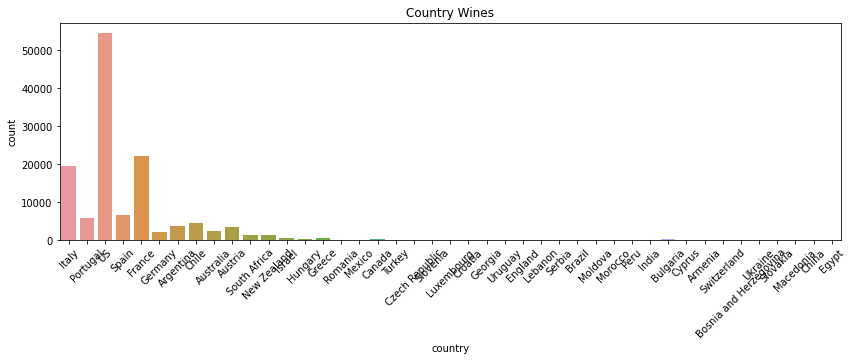

In [4]:
plt.figure(figsize=(14,4))
sns.countplot(x=wine.country)
plt.title('Country Wines')
plt.xticks(rotation=45)
plt.show()

In [5]:
pd.DataFrame(wine.country.value_counts()).reset_index()[23:30]

,index,country
23,Croatia,73
24,Mexico,70
25,Moldova,59
26,Brazil,52
27,Lebanon,35
28,Morocco,28
29,Peru,16


### Qual a origem e o tipo de vinhos mais baratos e mais caros avaliados? 

Os operadores `nlargest` e `nsmallest` do `Pandas` são bastante úteis para responder esse tipo de questões sobre os dados.

In [6]:
wine.loc[wine.price.nlargest(5).index][['country','title','variety','price']]

,country,title,variety,price
80290,France,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,3300.0
15840,France,Château Pétrus 2014 Pomerol,Bordeaux-style Red Blend,2500.0
98380,France,Domaine du Comte Liger-Belair 2010 La Romanée,Pinot Noir,2500.0
120391,US,Blair 2013 Roger Rose Vineyard Chardonnay (Arr...,Chardonnay,2013.0
65352,France,Château Pétrus 2011 Pomerol,Bordeaux-style Red Blend,2000.0


In [7]:
wine.loc[wine.price.nsmallest(5).index][['country','title','variety','price']]

,country,title,variety,price
1987,Spain,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,4.0
20484,US,Dancing Coyote 2015 White (Clarksburg),White Blend,4.0
29553,Argentina,Broke Ass 2009 Red Malbec-Syrah (Mendoza),Malbec-Syrah,4.0
31530,US,Bandit NV Chardonnay (California),Chardonnay,4.0
59507,US,Pam's Cuties NV Unoaked Chardonnay (California),Chardonnay,4.0


E não deve ser surpresa para você que os vinhos Bordeaux e Franceses estão entre os mais caros vinhos avaliados.

### Como estão distribuídos os preços dos vinhos no Brasil e no Mundo?

As análises gráficas muitas vezes requerem sucessivos refinamentos. 

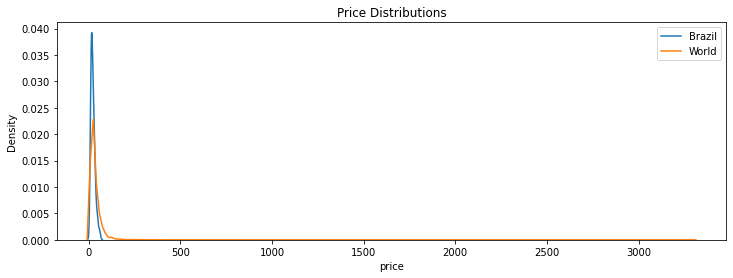

In [8]:
plt.figure(figsize=(12,4))
sns.kdeplot(wine[wine.country == 'Brazil'].price,label='Brazil')
sns.kdeplot(wine.price,label='World')
plt.title('Price Distributions')
plt.legend()
plt.show()


Ao fazermos o gráfico de distribuição acima podemos ver que a maior parte dos vinhos (área abaixo da curva) se encontra abaixo dos USD 100. Mas a visualização é bastante prejudicada pela dispersão dos valores e os valores discrepantes, como podemos ver com um gráfico `boxplot`.

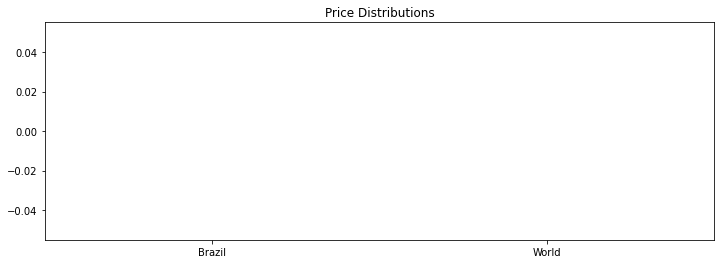

In [9]:
plt.figure(figsize=(12,4))
plt.boxplot(wine[wine.country == 'Brazil'].price,positions=[1])
plt.boxplot(wine.price,positions=[2])
plt.title('Price Distributions')
plt.xticks(ticks=[1,2], labels=['Brazil','World'])
plt.show()

Mas o gráfico acima não exibe os valores! De fato, como existem valores nulos em `price` o `Matplotlib` falha em calcular as estatísticas dos quartis requeridas. Desse modo temos que excluir os valores nulos. Há muitas formas de se fazer isso e adotaremos aqui o modo mais simples e direto. 

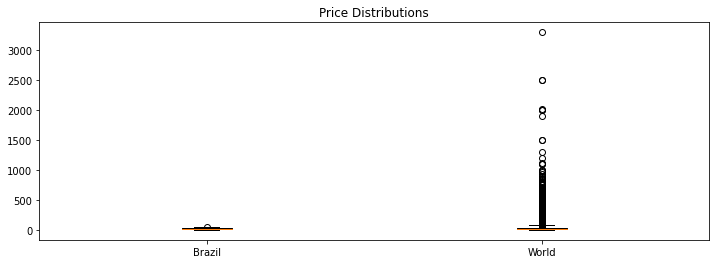

In [10]:
wine_not_null = wine[ ~ np.isnan( wine.price ) ] 

plt.figure(figsize=(12,4))
plt.boxplot(wine_not_null[wine_not_null.country == 'Brazil'].price,positions=[1])
plt.boxplot(wine_not_null.price,positions=[2])
plt.title('Price Distributions')
plt.xticks(ticks=[1,2], labels=['Brazil','World'])
plt.show()

Fica evidente assim a presença de inúmeros outliers nos dados e podemos, assim, excluí-los para uma melhor visualização.

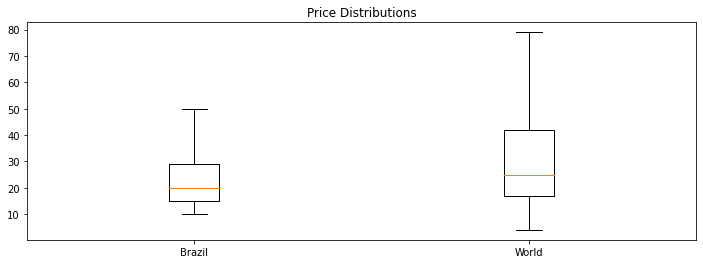

In [11]:
plt.figure(figsize=(12,4))
plt.boxplot(wine_not_null[wine_not_null.country == 'Brazil'].price,positions=[1],showfliers=False)
plt.boxplot(wine_not_null.price,positions=[2],showfliers=False)
plt.title('Price Distributions')
plt.xticks(ticks=[1,2], labels=['Brazil','World'])
plt.show()

Observamos assim que vinhos acima de USD 80 são valores discrepantes no mercado, estando a maior parte dos vinhos abaixo de USD 50-40, e que os valores dos vinhos nacionais não são, afinal, tão distantes do mercado mundial.

### De que regiões vem os vinhos Brasileiros avaliados?

Talvez você esteja curioso em saber a origem dos vinhos nacionais e essa é uma pergunta bastante simples de ser respondida, e não deve ser surpresa descobrir que a maior parte dos vinhos nacionais avaliados vem da Serra Gaúcha.

In [12]:
wine[wine.country == 'Brazil'].province.unique()

array(['Pinto Bandeira', 'Santa Catarina', 'Campanha', 'Serra Gaúcha',
       'Vale dos Vinhedos', 'Brazil', 'Vale Trentino', 'Serra do Sudeste'],
      dtype=object)

In [13]:
wine[wine.country == 'Brazil'].groupby('province').province.count()

province
Brazil                7
Campanha              4
Pinto Bandeira        6
Santa Catarina        2
Serra Gaúcha         18
Serra do Sudeste      1
Vale Trentino         5
Vale dos Vinhedos     9
Name: province, dtype: int64

Eles, entretanto, não são os vinhos em média mais caros do Brasil.


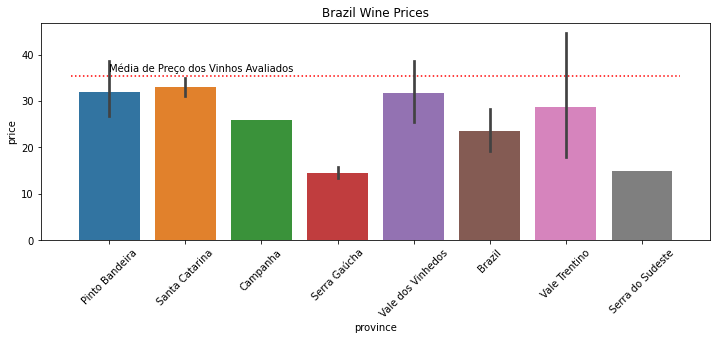

In [14]:
plt.figure(figsize=(12,4))
sns.barplot(x=wine[wine.country == 'Brazil'].province, y=wine[wine.country == 'Brazil'].price)
plt.title('Brazil Wine Prices')
plt.hlines(wine.price.mean(),-0.5,7.5,color='r',linestyles=':')
plt.text(0, wine.price.mean()+1,'Média de Preço dos Vinhos Avaliados')
plt.xticks(rotation=45)
plt.show()


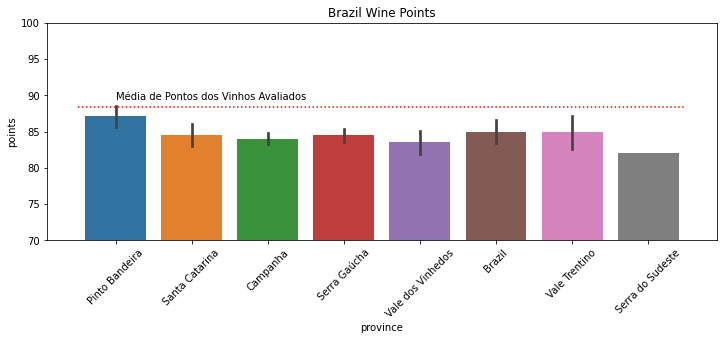

In [15]:
plt.figure(figsize=(12,4))
sns.barplot(x=wine[wine.country == 'Brazil'].province, y=wine[wine.country == 'Brazil'].points)
plt.title('Brazil Wine Points')
plt.hlines(wine.points.mean(),-0.5,7.5,color='r',linestyles=':')
plt.text(0, wine.points.mean()+1,'Média de Pontos dos Vinhos Avaliados')
plt.xticks(rotation=45)
plt.ylim([70,100])
plt.show()

E, portanto, talvez você não precise pagar mais para tomar um bom vinho. 

Mas de qualquer modo, os vinhos brasileiros estão têm preços abaixo da média mundial, mas também avaliações abaixo da média.

### Os melhores vinhos são os vinhos mais caros? 

É claro que aqui consideramos *melhores* os vinhos melhor avaliados. De fato, uma simples exibição dos dados permite ver essa relação.

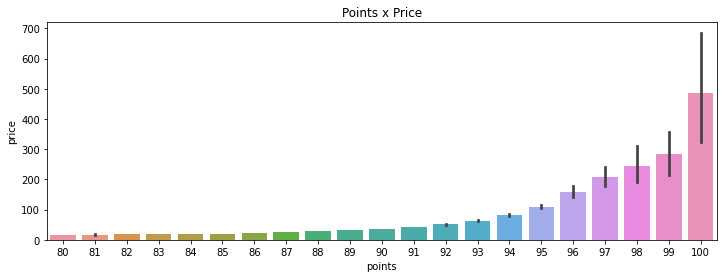

In [16]:
plt.figure(figsize=(12,4))
sns.barplot(x=wine.points, y=wine.price)
plt.title('Points x Price')
plt.show()

Mais adiante no curso, quando você conhecer técnicas estatísticas como testes de hipóteses, pode aplicar neste caso e confirmar a dependência e as avaliações e o preço,  que observamos aqui visualmente.  

### Os vinhos Franceses são mesmo os mais caros e bem avaliados?

Embora os vinhos Franceses superem em preço e pontuação as médias globais, uma análise mais detalhada mostra que existem muitos países que parecem apresentar vinhos melhores e mais caros. 

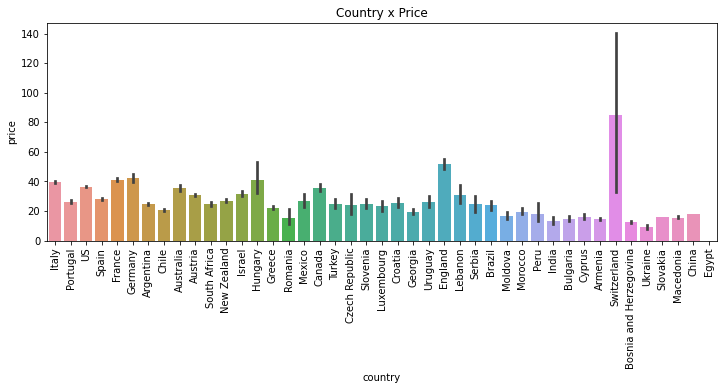

In [17]:
plt.figure(figsize=(12,4))
sns.barplot(x=wine.country, y=wine.price)
plt.title('Country x Price')
plt.xticks(rotation=90)
plt.show()


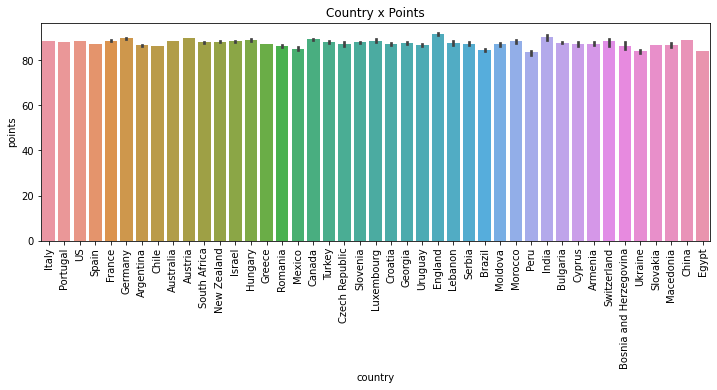

In [18]:
plt.figure(figsize=(12,4))
sns.barplot(x=wine.country, y=wine.points)
plt.title('Country x Points')
plt.xticks(rotation=90)
plt.show()

Novamente a visualização falha em mostrar adequadamente os dados, mas aqui o refinamento é bastante simples e basta reconfigurarmos os limites do eixo de pontos.

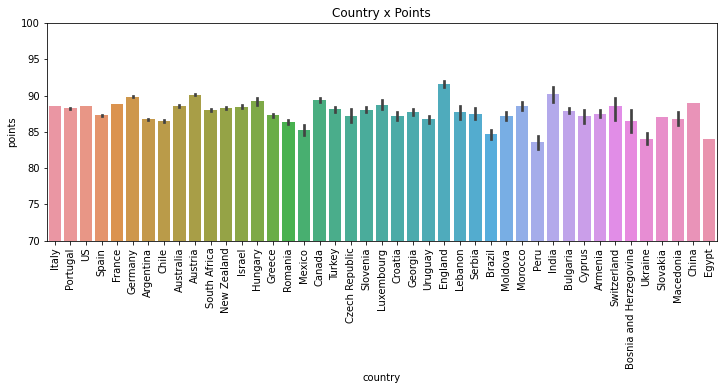

In [19]:
plt.figure(figsize=(12,4))
sns.barplot(x='country', y='points', data=wine)
plt.title('Country x Points')
plt.xticks(rotation=90)
plt.ylim([70,100])
plt.show()

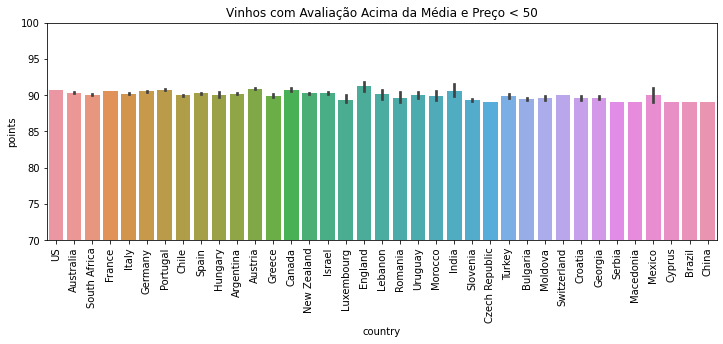

In [20]:
plt.figure(figsize=(12,4))
sns.barplot(x='country', y='points', data=wine[ (wine.price < 50) & (wine.points > wine.points.mean() ) ])
plt.title('Vinhos com Avaliação Acima da Média e Preço < 50')
plt.xticks(rotation=90)
plt.ylim([70,100])
plt.show()

### Conclusão das Análises

Podemos nos estender por muito mais análises desses dados, mas quando trabalhamos em um caso real o objetivo da 
análise vai direcionar e limitar essas possibilidades.

De qualquer modo qualquer análise deve ter uma conclusão e aqui poderíamos resumir alguns dos nossos resultados.

Os vinhos brasileiros avaliados são produzidos em sua maioria na região sul do país. São vinhos bastante baratos em comparação ao mercado internacional, mas também vinhos  mal avaliados quando comparados à média mundial. O preço e pontuação dos vinhos são bastante relacionados, mas há uma faixa de vinhos bastante bem avaliados e com preços abaixo de USD 50 (gráfico abaixo), o que sugere que não é necessário gastar mais do que isso para beber um *excelente* vinho. Os vinhos Franceses, bastante famosos, embora superem em qualidade e preço a média dos demais países, são surpreendentemente superados por outros países como a Índia, Inglaterra e Alemanha.  

Novamente, essas análises são apenas um exercício sobre as técnicas que queremos explorar e conclusões mais definitivas deveríamos deixar a cargo de *sommeliers*. 